In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-abbe7d4f-981f-dac2-6ac8-31c47a36c845)


In [ ]:
!pip install -U -q tf-nightly

import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import datetime
print(f"Notbook last run (end-to-end): {datetime.datetime.now()}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.2/490.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Tensorflow version: 2.15.0-dev20230817
Notbook last run (end-to-end): 2023-08-17 12:50:46.211707


##Getting Helper Functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-17 12:50:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-17 12:50:46 (81.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#import series of helper functions from the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

##Using TensorFlow Datasets to Download Data

In [ ]:
#Get tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
#list all availabel datasets
datasets_list = tfds.list_builders() #Get all availabel datasets in TFDS
print("food101" in datasets_list) #checking whether the required dataset is present in the TFDS

True


In [ ]:
# Load in the food101 dataset
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True, #data gets returned in tuple format(data,label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete0W4HKL/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete0W4HKL/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
 - Class names
 - The shape of our input data (image tensors)
 - The datatype of our data
 - What the labels look like (eg. are they one-hot encoded or are they label encoded)
 - Do the labels match up with the class names

In [ ]:
#Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
#Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
 #Take one sample of the train data
 train_one_sample = train_data.take(1) #samples are in format(image_tensor, label)

In [ ]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
#output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target class from Food101 (tesnor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tesnor form): 43
  Class name (str form): fried_calamari
  


In [ ]:
#What does the image tensor from TFDS's food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[71, 60, 56],
        [70, 59, 55],
        [70, 59, 55],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[62, 51, 47],
        [64, 53, 49],
        [66, 55, 51],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[61, 50, 46],
        [65, 54, 50],
        [68, 57, 53],
        ...,
        [66, 61, 68],
        [65, 60, 67],
        [63, 58, 65]],

       ...,

       [[63, 64, 66],
        [64, 65, 67],
        [67, 67, 69],
        ...,
        [45, 42, 49],
        [45, 42, 49],
        [45, 42, 49]],

       [[64, 64, 66],
        [64, 64, 66],
        [65, 65, 67],
        ...,
        [44, 41, 48],
        [44, 41, 48],
        [44, 41, 48]],

       [[62, 62, 64],
        [62, 62, 64],
        [62, 62, 64],
        ...,
        [43, 40, 47],
        [42, 39, 46],
        [42, 39, 46]]], dtype=uint8)>

In [ ]:
#what are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

###Plot an image from tensorflow dataset

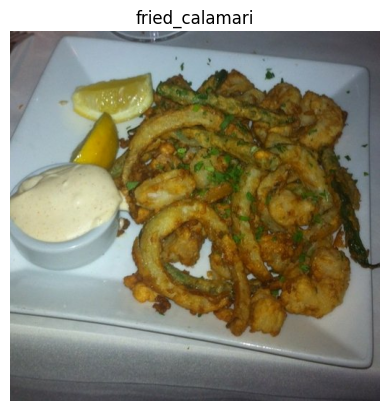

In [ ]:
#Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) #Add title to image to verify the label is associated with the right image
plt.axis(False);

##Creating pre-processing functions

Neural networks perform best when a data is in certain way (eg. batched, normalized, etc).

However, not all data (including data from Tensorflow Datasets) comes like this.

So in order to get it ready for a neural network, youll often have to write preprocessing functions and map it to your data.

What we know about data:
 - In 'uint8' datatype
 - Comprised of all different size tensors (different sized images)
 - Not scaled (the pixel values are between 0 and 255)

What we know models like:
 - Data in 'float32' dtype (or for mixed precision 'float16' and 'float32')
 - For batches, tensorflow like all of the tensors within a batch to be of the same size
 - Scaled (values between 0 and 1) also called normalized tensors generally perform better


 Since we are using an efficientnetBX pretrained model from tf.keras.applications we dont need to rescale our data (these architectures have rescaling built-in)

 This means the functions need to:
 1. Reshape our images to all the same size
 2. Convert the dtype of our image tensors from 'unit8' to 'float32'

In [ ]:
#Make a functions for pre-processing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' to float32 and reshapes
  image to [img_shape, img_shape, colour_channels]
  """

  image = tf.image.resize(image,[img_shape,img_shape]) # reshape target image
  #image = image/255. #scale image values(not required with EfficientNetBX models from tf.keras.applications)
  return tf.cast(image, tf.float32), label #return (float32_image, label) tuple


In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[71 60 56]
  [70 59 55]
  [70 59 55]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]

 [[62 51 47]
  [64 53 49]
  [66 55 51]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[ 65.81122   54.811222  50.811222]
  [ 73.331635  62.331635  58.331635]
  [104.015305  89.80102   86.80102 ]
  ...
  [ 61.85712   59.071384  65.64286 ]
  [ 65.        60.        67.      ]
  [ 64.64282   59.642822  66.64282 ]]

 [[ 67.28571   56.285717  52.285717]
  [ 66.47449   55.47449   51.47449 ]
  [ 67.73979   53.525505  50.525505]
  ...
  [ 64.14284   61.3571    67.92857 ]
  [ 65.93368   60.933674  67.93368 ]
  [ 64.285645  59.285645  66.285645]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


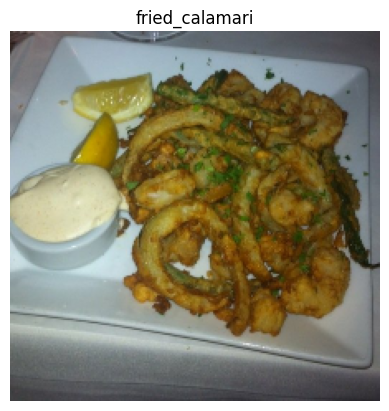

In [ ]:
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

##Batch and prepare datasets

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
#Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size=tf.data.AUTOTUNE)

#Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
# Turn test data into batches (dont need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

##Creating Modelling Callbacks

- Tensorboard callback to log training results(so we can visualize them later if need be)
- ModelCheckpoint callback to save our models progress after feature extraction


In [ ]:
# create tensorboard callback (imort from helper function)
from helper_functions import create_tensorboard_callback

# create a model checkpoint callback to save the models progress
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0) #dont print wheteher or not the model is being saved

##Setup Mixed Precision Training
 - speeds up and increases the model's performance

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

##Build Feature Extraction model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
#Note: EfficientNetBx models have rescaling built-in but if your model doesnt you can use a additional layer as below
# x = preprocessing.Rescaling(1./255)(x)

x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x =layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

#compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

##Checking layer dtype policies (are we using mixed precision)

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Going through the above we see:
 - layer.name: the human readable name of particular layer.
 - layer.trainable: is th layer trainable or not? (if false the weights are frozen)
 - layer.dtype: the data type a layer stores its variables in
 - layer.dtype_policy: the data type policy a layer co mputes on its variables with

In [ ]:
#check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

##Fit the feature extraction model

If the goal is to fine-tune a pretrained model, the general order of doing things is:

1. Build a feature extraction model ( train a couple output layers with base layers frozen)

2. Fine-tune some of the frozen layers

In [ ]:
#Fit feature extraction model with call backs
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name = "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230817-130504
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7187 - accuracy: 0.5824

2368/2368 [==============================] - 210s 80ms/step - loss: 1.7187 - accuracy: 0.5824 - val_loss: 1.1327 - val_accuracy: 0.6986
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2008 - accuracy: 0.6898

2368/2368 [==============================] - 186s 76ms/step - loss: 1.2008 - accuracy: 0.6898 - val_loss: 1.0266 - val_accuracy: 0.7169
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0545 - accuracy: 0.7244

2368/2368 [==============================] - 193s 80ms/step - loss: 1.0545 - accuracy: 0.7244 - val_loss: 0.9879 - val_accuracy: 0.7278


##Using EfficientNetB4 model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable = False

#create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
#Note: EfficientNetBx models have rescaling built-in but if your model doesnt you can use a additional layer as below
# x = preprocessing.Rescaling(1./255)(x)

x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x =layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

#compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

71686520/71686520 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional  (None, None, None, 1792   17673823  
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1792)              0         
 gePooling2D)                                                    
                                                                 
 dense_1 (Dense)             (None, 101)               181093    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [ ]:
#Fit feature extraction model with call backs
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name = "efficientnetb4_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb4_101_classes_all_data_feature_extract/20230817-140139
Epoch 1/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.0633 - accuracy: 0.7171

2368/2368 [==============================] - 264s 110ms/step - loss: 1.0633 - accuracy: 0.7171 - val_loss: 1.1069 - val_accuracy: 0.6999
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 0.9905 - accuracy: 0.7353

2368/2368 [==============================] - 270s 113ms/step - loss: 0.9905 - accuracy: 0.7353 - val_loss: 1.0898 - val_accuracy: 0.7018
Epoch 3/3
2367/2368 [============================>.] - ETA: 0s - loss: 0.9288 - accuracy: 0.7524

2368/2368 [==============================] - 243s 101ms/step - loss: 0.9287 - accuracy: 0.7524 - val_loss: 1.0822 - val_accuracy: 0.7050


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip")

--2023-08-17 14:34:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 172.253.118.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  6.65MB/s    in 1.9s    

2023-08-17 14:34:39 (6.65 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



NameError: ignored

In [ ]:
import zipfile

# Define a function to unzip the file
def unzip_data(zip_file_path, extract_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Download the ZIP file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

# Specify the paths
zip_file_path = 'custom_food_images.zip'
extract_path = 'data'  # Choose the directory where you want to extract the files

# Unzip the downloaded file
unzip_data(zip_file_path, extract_path)


--2023-08-17 14:36:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.251.175.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  7.33MB/s    in 1.7s    

2023-08-17 14:36:10 (7.33 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [ ]:
import os

# Specify the path to the extracted images directory
images_directory = 'data/custom_food_images'  # Adjust this path as needed

# List the contents of the directory
image_files = os.listdir(images_directory)

# Create a list of full file paths for the images
custom_food_images = [os.path.join(images_directory, img_path) for img_path in image_files]

# Display the list of image file paths
print(custom_food_images)


['data/custom_food_images/hamburger.jpeg', 'data/custom_food_images/pizza-dad.jpeg', 'data/custom_food_images/steak.jpeg', 'data/custom_food_images/sushi.jpeg', 'data/custom_food_images/chicken_wings.jpeg', 'data/custom_food_images/ramen.jpeg']


In [ ]:
from helper_functions import load_and_prep_image

1/1 [==============================] - 0s 38ms/step


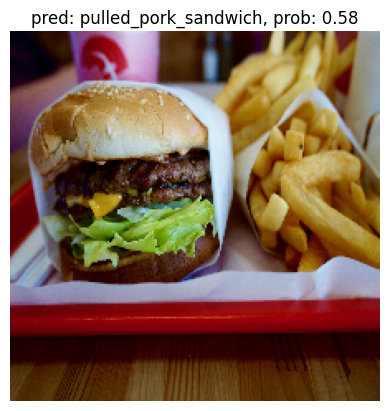

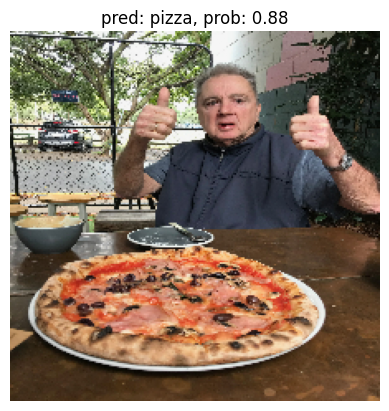

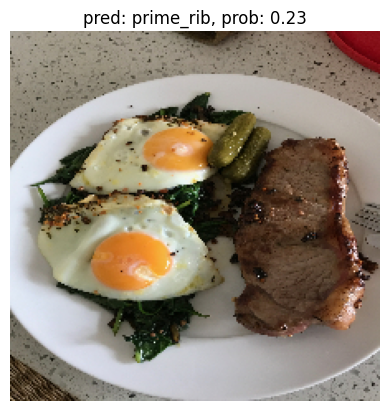

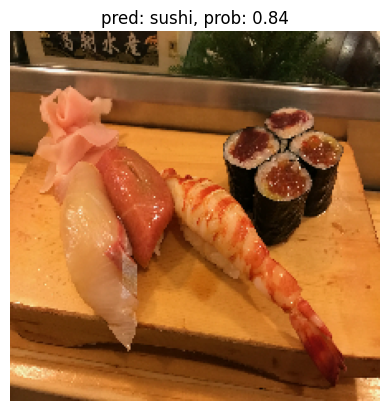

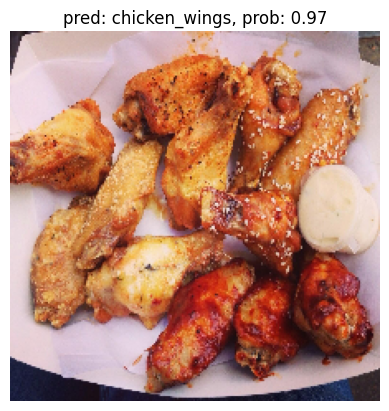

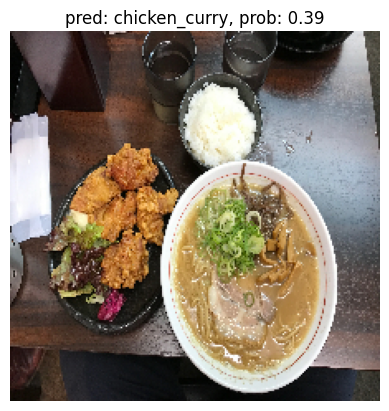

In [ ]:
# Make predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)
